In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import unidecode
from pattern.en import sentiment, polarity, subjectivity
%matplotlib inline

In [27]:
def sentiment(text):
    return polarity(text)

def subj(text):
    return subjectivity(text)

In [28]:
def remove_html_tags(data):
    p = re.compile(r'<[^<]*?>')
    return p.sub('', data)

In [35]:
def sentiment_new(text):
    def Sentences(paragraph):
        sentenceEnders = re.compile('[.!?]')
        sentenceList = sentenceEnders.split(paragraph)
        return sentenceList
    content = unidecode.unidecode(text).replace("\n"," ").replace("\'", " ")
    s_max = 0
    comment_score = 0

    for i in Sentences(content):
        if abs(sentiment(i)) > abs(s_max):
            comment_score = sentiment(i)
            s_max = sentiment(i)
    return comment_score

In [36]:
def subj_new(text):
    def Sentences(paragraph):
        sentenceEnders = re.compile('[.!?]')
        sentenceList = sentenceEnders.split(paragraph)
        return sentenceList
    content = unidecode.unidecode(text).replace("\n"," ").replace("\'", " ")
    s_max = 0
    comment_score = 0

    for i in Sentences(content):
        if abs(subj(i)) > abs(s_max):
            comment_score = subj(i)
            s_max = subj(i)
    return comment_score

In [42]:
candidates = ['trump', 'bush'] #did hilary already

In [43]:
for c in candidates:
    data = pd.read_csv('data/'+c+'_meta.csv')
    data[pd.isnull(data['Comment'])] = ""
    data['Comment'] = data.apply(lambda row: remove_html_tags(row['Comment']), axis = 1)
    data['Sentiment'] = data.apply(lambda row: sentiment(row['Comment']), axis = 1)
    data['Sentiment_sent'] = data.apply(lambda row: sentiment_new(row['Comment']), axis = 1)
    data['Sentiment_b'] = data['Sentiment'] >= 0
    data['Sentiment_b'] = data['Sentiment_b'].astype(int) 
    data['Sentiment_b_sent'] = data['Sentiment_sent'] >= 0
    data['Sentiment_b_sent'] = data['Sentiment_b_sent'].astype(int)
    
    data['Subjectivity'] = data.apply(lambda row: subj(row['Comment']), axis = 1)
    data['Subjectivity_sent'] = data.apply(lambda row: sentiment_new(row['Comment']), axis = 1)
    data['Subjectivity_b'] = data['Subjectivity'] >= 0
    data['Subjectivity_b'] = data['Subjectivity_b'].astype(int) 
    data['Subjectivity_b_sent'] = data['Subjectivity_sent'] >= 0
    data['Subjectivity_b_sent'] = data['Subjectivity_b_sent'].astype(int) 
    data.to_csv('data/'+c+'_scores.csv')

/Users/datascientist/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.


In [19]:
hilary = pd.read_csv('data/hilary_scores.csv')
sanders = pd.read_csv('data/sanders_scores.csv')
biden = pd.read_csv('data/biden_scores.csv')
trump = pd.read_csv('data/trump_scores.csv')
bush = pd.read_csv('data/bush_scores.csv')
carson = pd.read_csv('data/carson_scores.csv')

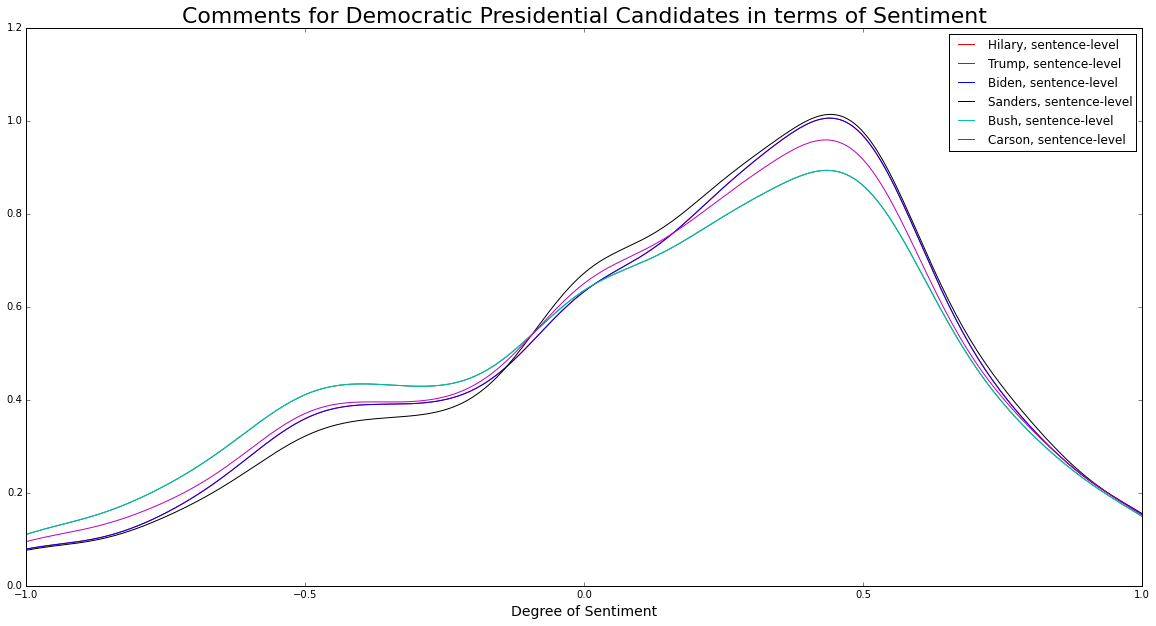

In [22]:
from scipy.stats import gaussian_kde

plt.figure(figsize=(20,10))

metric = 'Sentiment'

data = hilary[metric]
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'r', label = 'Hilary, sentence-level')

data = trump[metric]
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'g', label = 'Trump, sentence-level')

data = biden[metric]
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'b', label = 'Biden, sentence-level')

data = sanders[metric]
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'black', label = 'Sanders, sentence-level')

data = bush[metric]
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'c', label = 'Bush, sentence-level')

data = carson[metric]
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'm', label = 'Carson, sentence-level')
plt.xlabel('Degree of Sentiment', fontsize=14)
plt.title('Comments for Democratic Presidential Candidates in terms of Sentiment', fontsize=22)

plt.legend()
plt.show()